# Handwritten Digit Recognition

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [19]:
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

In [20]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [21]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [22]:
X_test.shape, y_test.shape
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [23]:
np.min(X_train), np.max(X_train)

(0, 255)

In [24]:
np.isnan(X_train).sum() # หา missing value

0

In [25]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


# Visualization

In [26]:
X_train[0]
X_train[0][0:, 7:20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26],
       [  0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172],
       [ 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251,  93,  82],
       [ 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241,   0,   0],
       [  0,  80, 156, 107, 253, 253, 205,  11,   0,  43, 154,   0,   0],
       [  0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 139, 253, 190,   2,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  11, 190, 253,  70,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  35, 

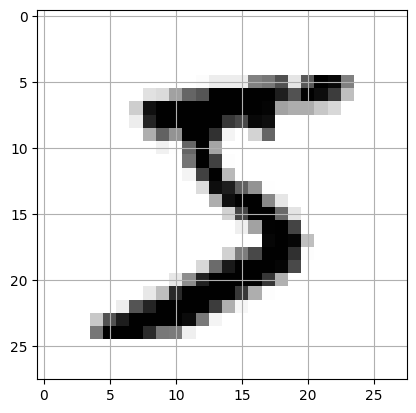

In [27]:
import matplotlib.pyplot as plt

idx = 0
img = X_train[idx]                  # image at index
plt.imshow(img, cmap=plt.cm.gray_r) # actutal BG is black (invert)
#plt.imshow(img, cmap=plt.cm.gray)  

plt.grid() 
plt.show()



In [28]:
y_train[idx] # class (เลขอะไร)

5

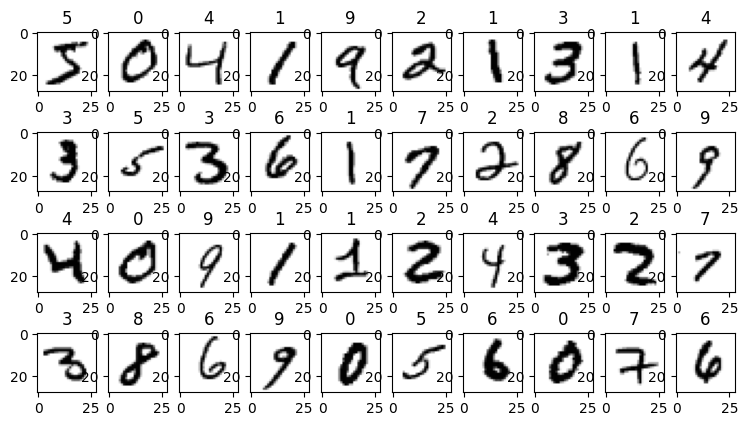

In [29]:
def visual_multi(i):
    nplots = 40
    fig = plt.figure(figsize=(9, 5))
    for j in range(nplots):
        plt.subplot(4, 10, j+1)
        plt.imshow(X_train[i+j], cmap=plt.cm.gray_r)
        plt.title(y_train[i+j])
    
    plt.show()

visual_multi(0) # ตัวเริ่มจากเลขอะไร


## Prepare Dataset (Re-shape the Structure)

In [30]:
print(X_train.shape)
print(X_train.shape) 

(60000, 28, 28)
(60000, 28, 28)


In [31]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [32]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [33]:
# Normalize
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [34]:
# Normalize Check
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [18]:
# Select samples
num_samples = 3500         # number of samples to train and also num to test

X_train = X_train[:num_samples]
y_train = y_train[:num_samples]

X_test = X_test[:num_samples]
y_test = y_test[:num_samples]


In [35]:
X_train.shape

(60000, 28, 28, 1)

In [36]:
print('Train: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test: X={}, y={}'.format(X_test.shape, y_test.shape))

Train: X=(60000, 28, 28, 1), y=(60000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


## Create Model

In [37]:
num_classes = len(np.unique(y_train))
num_classes

10

In [38]:
in_shape = X_train.shape[1:]
in_shape

(28, 28, 1)

In [39]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten #, Dropout

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
import time
start = time.time()

history = model.fit(X_train, y_train, epochs=8, batch_size=256, verbose=1, validation_split=0.15)

end = time.time()

print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/8
200/200 [==============================] - 9s 7ms/step - loss: 0.3352 - accuracy: 0.9032 - val_loss: 0.0971 - val_accuracy: 0.9713
Epoch 2/8
200/200 [==============================] - 1s 5ms/step - loss: 0.0810 - accuracy: 0.9754 - val_loss: 0.0638 - val_accuracy: 0.9818
Epoch 3/8
200/200 [==============================] - 1s 4ms/step - loss: 0.0556 - accuracy: 0.9831 - val_loss: 0.0532 - val_accuracy: 0.9839
Epoch 4/8
200/200 [==============================] - 1s 4ms/step - loss: 0.0439 - accuracy: 0.9861 - val_loss: 0.0516 - val_accuracy: 0.9859
Epoch 5/8
200/200 [==============================] - 1s 4ms/step - loss: 0.0357 - accuracy: 0.9893 - val_loss: 0.0438 - val_accuracy: 0.9882
Epoch 6/8
200/200 [==============================] - 1s 4ms/step - loss: 0.0287 - accuracy: 0.9914 - val_loss: 0.0420 - val_accuracy: 0.9880
Epoch 7/8
200/200 [==============================] - 1s 4ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0394 - val_accuracy: 0.9883
Epoch 8/8
200

In [43]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {:.3f}'.format(score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0321 - accuracy: 0.9880
Accuracy: 0.988


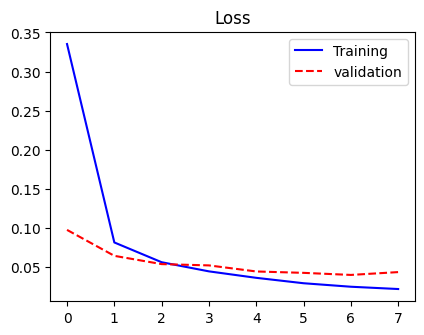

In [44]:
plt.figure(figsize=(4.7, 3.5))
plt.plot(history.history['loss'], color='b', label="Training")
plt.plot(history.history['val_loss'], 'r--', label="validation")
plt.title('Loss')
plt.legend()
plt.show()

## Predict X_test

In [45]:
y_pred = model.predict(X_test)
y_pred[:8].round(2)

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]],
      dtype=float32)

In [46]:
y_pred_cls = np.argmax(y_pred, axis=1)
y_pred_cls[:10].round(2)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [47]:
y_test[:10]  # actual class (real number) เลขจริง

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [48]:
idx_miss = np.where(y_pred_cls != y_test)

print(len(idx_miss[0]))

120


In [49]:
print(idx_miss[0][:15]) 

[  18  247  321  340  404  445  449  582  583  619  659  740  924  947
 1014]


In [50]:
y_test[idx_miss][:15] # actual class (real number) เลขจริง

array([3, 4, 2, 5, 2, 6, 3, 8, 2, 1, 2, 4, 2, 8, 6], dtype=uint8)

In [51]:
y_pred_cls[idx_miss][:15] # Predicted

array([8, 6, 7, 3, 7, 0, 5, 2, 7, 8, 1, 9, 7, 9, 5], dtype=int64)

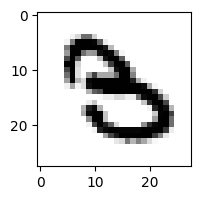

In [52]:
fig = plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_miss][0].reshape(28,28), cmap=plt.cm.gray_r)
plt.show()

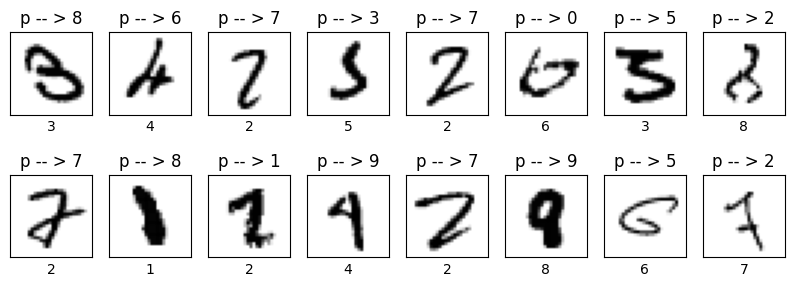

In [53]:
nplots = 16

fig = plt.figure(figsize=(10, 3.4))
for j,k in enumerate(idx_miss[0]):
    plt.subplot(2, 8, j+1)
    plt.imshow(X_test[k].reshape(28, 28), cmap=plt.cm.gray_r)
    plt.title('p -- > {}'.format(y_pred_cls[k]))
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_test[k])
    if j >= nplots-1:
       break
#       plt.axis('off')
 
plt.show()

In [109]:
from fileinput import filename
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale

#filename = 'images/number/digit9-1.png'
filename = 'images/number/7_32.png'

img = load_img(filename, target_size=(28, 28))
img

In [110]:
from PIL import Image, ImageOps

img = ImageOps.invert(img)
img = img_to_array(img)
img = rgb_to_grayscale(img)

print('shape=',img.shape)
print('max pixel value=',np.max(img))

img = img /255.0
print('max pixel value=',np.max(img))

img = np.expand_dims(img, axis=0)
img. shape

shape= (28, 28, 1)
max pixel value= 254.97452
max pixel value= 0.99990004


(1, 28, 28, 1)

In [111]:
y_pred = model.predict(img)

print(y_pred.round(3))

1/1 [==============================] - 0s 21ms/step
[[0.    0.806 0.092 0.1   0.    0.    0.    0.001 0.    0.   ]]


In [112]:
predicted = np.argmax(y_pred, -1)
print(predicted)

[1]


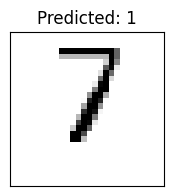

In [113]:
plt.figure(figsize=(2,2))
plt.imshow(img[0].reshape(28,28), cmap=plt.cm.gray_r)
plt.title('Predicted: {}'. format(predicted[0]))
plt.xticks([])
plt.yticks([])
plt.show()